## Kaggle – DataTops®
Luismi ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a Luismi a mejorar ese modelo?

## Métrica: 
Error de raíz cuadrada media (RMSE) es la desviación estándar de los valores residuales (errores de predicción). Los valores residuales son una medida de la distancia de los puntos de datos de la línea de regresión; RMSE es una medida de cuál es el nivel de dispersión de estos valores residuales. En otras palabras, le indica el nivel de concentración de los datos en la línea de mejor ajuste.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## Librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

import urllib.request

## Datos

In [2]:
# Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("./data/train.csv", index_col = 0)
df.index.name = None # quitamos el nombre al index

## Exploración de los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
dtypes: float64(2), object(10)
memory usage: 92.6+ KB


mirar si hay unknow - no hay nulos - mirar si hay duplicados

In [4]:
df.head()

Company        Product   TypeName  Inches   ScreenResolution  \
755      HP         250 G6   Notebook    15.6  Full HD 1920x1080   
618    Dell  Inspiron 7559     Gaming    15.6  Full HD 1920x1080   
909      HP    ProBook 450   Notebook    15.6  Full HD 1920x1080   
2     Apple    Macbook Air  Ultrabook    13.3           1440x900   
286    Dell  Inspiron 3567   Notebook    15.6  Full HD 1920x1080   

                             Cpu   Ram               Memory  \
755     Intel Core i3 6006U 2GHz   8GB            256GB SSD   
618  Intel Core i7 6700HQ 2.6GHz  16GB              1TB HDD   
909   Intel Core i7 7500U 2.7GHz   8GB              1TB HDD   
2           Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
286   Intel Core i3 6006U 2.0GHz   4GB              1TB HDD   

                                Gpu       OpSys  Weight  Price_in_euros  
755           Intel HD Graphics 520  Windows 10  1.86kg          539.00  
618  Nvidia GeForce GTX 960<U+039C>  Windows 10  2.59kg          879.01  
909            Nvidia GeForce 930MX  Windows 10  2.04kg          900.00  
2            Intel HD Graphics 6000       macOS  1.34kg          898.94  
286              AMD Radeon R5 M430       Linux  2.25kg          428.00

In [5]:
df.tail()

Company             Product            TypeName  Inches  \
28      Dell       Inspiron 5570            Notebook    15.6   
1160      HP         Spectre Pro  2 in 1 Convertible    13.3   
78    Lenovo  IdeaPad 320-15IKBN            Notebook    15.6   
23        HP              255 G6            Notebook    15.6   
229     Dell        Alienware 17              Gaming    17.3   

                     ScreenResolution                           Cpu   Ram  \
28                  Full HD 1920x1080    Intel Core i5 8250U 1.6GHz   8GB   
1160  Full HD / Touchscreen 1920x1080    Intel Core i5 6300U 2.4GHz   8GB   
78                  Full HD 1920x1080    Intel Core i5 7200U 2.5GHz   8GB   
23                           1366x768  AMD E-Series E2-9000e 1.5GHz   4GB   
229       IPS Panel Full HD 1920x1080   Intel Core i7 7700HQ 2.8GHz  16GB   

                    Memory                      Gpu       OpSys  Weight  \
28               256GB SSD           AMD Radeon 530  Windows 10   2.2kg   
1160             256GB SSD    Intel HD Graphics 520  Windows 10  1.48kg   
78                 2TB HDD    Intel HD Graphics 620       No OS   2.2kg   
23               500GB HDD            AMD Radeon R2       No OS  1.86kg   
229   256GB SSD +  1TB HDD  Nvidia GeForce GTX 1060  Windows 10  4.42kg   

      Price_in_euros  
28            800.00  
1160         1629.00  
78            519.00  
23            258.00  
229          2456.34

In [6]:
len(df[df.duplicated])
print("El dataset tiene", len(df[df.duplicated]), "duplicados")
#hay duplicados, quitarlos

El dataset tiene 21 duplicados


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           891 non-null    object 
 1   Product           891 non-null    object 
 2   TypeName          891 non-null    object 
 3   Inches            891 non-null    float64
 4   ScreenResolution  891 non-null    object 
 5   Cpu               891 non-null    object 
 6   Ram               891 non-null    object 
 7   Memory            891 non-null    object 
 8   Gpu               891 non-null    object 
 9   OpSys             891 non-null    object 
 10  Weight            891 non-null    object 
 11  Price_in_euros    891 non-null    float64
dtypes: float64(2), object(10)
memory usage: 90.5+ KB


In [9]:
df.describe()

Inches  Price_in_euros
count  891.00000      891.000000
mean    14.98642     1122.550797
std      1.44241      690.244047
min     10.10000      174.000000
25%     14.00000      597.000000
50%     15.60000      997.900000
75%     15.60000     1496.500000
max     18.40000     6099.000000

In [10]:
df.Company.value_counts()

#columna categorica: 8 brands, todo el resto que tenga menos de 10 unidad ponerlo en una unica variable : OthersCompany

Company
Lenovo       194
Dell         193
HP           191
Asus         116
Acer          73
MSI           37
Toshiba       34
Apple         17
Razer          6
Mediacom       6
Samsung        5
Microsoft      5
Xiaomi         3
Huawei         2
Chuwi          2
Google         2
Vero           2
Fujitsu        2
LG             1
Name: count, dtype: int64

In [11]:
brands = df.Company.value_counts()[df.Company.value_counts() <= 5].index
brands

Index(['Samsung', 'Microsoft', 'Xiaomi', 'Huawei', 'Chuwi', 'Google', 'Vero',
       'Fujitsu', 'LG'],
      dtype='object', name='Company')

In [12]:
df.loc[df['Company'].isin(brands), 'Company'] = 'OthersCompany'

In [13]:
df.Company.value_counts() #hacer un getdummies

Company
Lenovo           194
Dell             193
HP               191
Asus             116
Acer              73
MSI               37
Toshiba           34
OthersCompany     24
Apple             17
Razer              6
Mediacom           6
Name: count, dtype: int64

In [14]:
df.Product.value_counts() 
# no la considero

Product
XPS 13                 23
Inspiron 3567          19
Legion Y520-15IKBN     15
Vostro 3568            14
ProBook 450            13
                       ..
Zenbook Flip            1
Omen 17-w207nv          1
Extensa EX2540-58KR     1
IdeaPad 110-15IBR       1
Portege Z30-C-16P       1
Name: count, Length: 480, dtype: int64

In [15]:
df.TypeName.value_counts()  #hacer un getdummies

TypeName
Notebook              494
Gaming                143
Ultrabook             140
2 in 1 Convertible     76
Workstation            20
Netbook                18
Name: count, dtype: int64

In [16]:
# Fetching touchscreen data from screenresolution column
df['touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if "Touchscreen" in x else 0)

In [17]:
# Fetching if Ips pannel is present in Screenresolution and storing it in new column
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [18]:
df.Gpu.value_counts()

Gpu
Intel HD Graphics 620       184
Intel HD Graphics 520       121
Intel UHD Graphics 620       52
Nvidia GeForce GTX 1050      48
Nvidia GeForce 940MX         31
                           ... 
AMD Radeon RX 540             1
Nvidia Quadro M2000M          1
Nvidia GeForce GTX 940M       1
AMD Radeon R5 520             1
Nvidia GeForce GTX 1070M      1
Name: count, Length: 93, dtype: int64

In [19]:
df['gpu_brand']  = df['Gpu'].apply(lambda x:x.split()[0])

In [20]:
df['gpu_brand'].value_counts()

gpu_brand
Intel     496
Nvidia    280
AMD       115
Name: count, dtype: int64

In [21]:
df

Company             Product            TypeName  Inches  \
755       HP              250 G6            Notebook    15.6   
618     Dell       Inspiron 7559              Gaming    15.6   
909       HP         ProBook 450            Notebook    15.6   
2      Apple         Macbook Air           Ultrabook    13.3   
286     Dell       Inspiron 3567            Notebook    15.6   
...      ...                 ...                 ...     ...   
28      Dell       Inspiron 5570            Notebook    15.6   
1160      HP         Spectre Pro  2 in 1 Convertible    13.3   
78    Lenovo  IdeaPad 320-15IKBN            Notebook    15.6   
23        HP              255 G6            Notebook    15.6   
229     Dell        Alienware 17              Gaming    17.3   

                     ScreenResolution                           Cpu   Ram  \
755                 Full HD 1920x1080      Intel Core i3 6006U 2GHz   8GB   
618                 Full HD 1920x1080   Intel Core i7 6700HQ 2.6GHz  16GB   
909                 Full HD 1920x1080    Intel Core i7 7500U 2.7GHz   8GB   
2                            1440x900          Intel Core i5 1.8GHz   8GB   
286                 Full HD 1920x1080    Intel Core i3 6006U 2.0GHz   4GB   
...                               ...                           ...   ...   
28                  Full HD 1920x1080    Intel Core i5 8250U 1.6GHz   8GB   
1160  Full HD / Touchscreen 1920x1080    Intel Core i5 6300U 2.4GHz   8GB   
78                  Full HD 1920x1080    Intel Core i5 7200U 2.5GHz   8GB   
23                           1366x768  AMD E-Series E2-9000e 1.5GHz   4GB   
229       IPS Panel Full HD 1920x1080   Intel Core i7 7700HQ 2.8GHz  16GB   

                    Memory                             Gpu       OpSys  \
755              256GB SSD           Intel HD Graphics 520  Windows 10   
618                1TB HDD  Nvidia GeForce GTX 960<U+039C>  Windows 10   
909                1TB HDD            Nvidia GeForce 930MX  Windows 10   
2      128GB Flash Storage          Intel HD Graphics 6000       macOS   
286                1TB HDD              AMD Radeon R5 M430       Linux   
...                    ...                             ...         ...   
28               256GB SSD                  AMD Radeon 530  Windows 10   
1160             256GB SSD           Intel HD Graphics 520  Windows 10   
78                 2TB HDD           Intel HD Graphics 620       No OS   
23               500GB HDD                   AMD Radeon R2       No OS   
229   256GB SSD +  1TB HDD         Nvidia GeForce GTX 1060  Windows 10   

      Weight  Price_in_euros  touchscreen  Ips gpu_brand  
755   1.86kg          539.00            0    0     Intel  
618   2.59kg          879.01            0    0    Nvidia  
909   2.04kg          900.00            0    0    Nvidia  
2     1.34kg          898.94            0    0     Intel  
286   2.25kg          428.00            0    0       AMD  
...      ...             ...          ...  ...       ...  
28     2.2kg          800.00            0    0       AMD  
1160  1.48kg         1629.00            1    0     Intel  
78     2.2kg          519.00            0    0     Intel  
23    1.86kg          258.00            0    0       AMD  
229   4.42kg         2456.34            0    1    Nvidia  

[891 rows x 15 columns]

In [22]:
df.Cpu.value_counts()

Cpu
Intel Core i5 7200U 2.5GHz              124
Intel Core i7 7700HQ 2.8GHz             105
Intel Core i7 7500U 2.7GHz               95
Intel Core i5 8250U 1.6GHz               52
Intel Core i7 8550U 1.8GHz               47
                                       ... 
Intel Core i3 6006U 2.2GHz                1
Intel Atom Z8350 1.92GHz                  1
Intel Core i5 7200U 2.50GHz               1
AMD A6-Series 7310 2GHz                   1
Intel Pentium Dual Core N4200 1.1GHz      1
Name: count, Length: 107, dtype: int64

In [23]:
df['cpu_ghz'] = (df['Cpu'].apply(lambda x :"" .join(x.split()[-1]))).str.replace('GHz', '').astype(float)
#df['cpu_ghz'] = df['CpuGHz'].str.replace('GHz', '').astype(float)

In [24]:
df['CpuName'] = df['Cpu'].apply(lambda x :" " .join(x.split()[:3]))

In [25]:
def nombre_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [26]:
df['Cpu_brand'] = df['CpuName'].apply(nombre_processor)

In [27]:
df

Company             Product            TypeName  Inches  \
755       HP              250 G6            Notebook    15.6   
618     Dell       Inspiron 7559              Gaming    15.6   
909       HP         ProBook 450            Notebook    15.6   
2      Apple         Macbook Air           Ultrabook    13.3   
286     Dell       Inspiron 3567            Notebook    15.6   
...      ...                 ...                 ...     ...   
28      Dell       Inspiron 5570            Notebook    15.6   
1160      HP         Spectre Pro  2 in 1 Convertible    13.3   
78    Lenovo  IdeaPad 320-15IKBN            Notebook    15.6   
23        HP              255 G6            Notebook    15.6   
229     Dell        Alienware 17              Gaming    17.3   

                     ScreenResolution                           Cpu   Ram  \
755                 Full HD 1920x1080      Intel Core i3 6006U 2GHz   8GB   
618                 Full HD 1920x1080   Intel Core i7 6700HQ 2.6GHz  16GB   
909                 Full HD 1920x1080    Intel Core i7 7500U 2.7GHz   8GB   
2                            1440x900          Intel Core i5 1.8GHz   8GB   
286                 Full HD 1920x1080    Intel Core i3 6006U 2.0GHz   4GB   
...                               ...                           ...   ...   
28                  Full HD 1920x1080    Intel Core i5 8250U 1.6GHz   8GB   
1160  Full HD / Touchscreen 1920x1080    Intel Core i5 6300U 2.4GHz   8GB   
78                  Full HD 1920x1080    Intel Core i5 7200U 2.5GHz   8GB   
23                           1366x768  AMD E-Series E2-9000e 1.5GHz   4GB   
229       IPS Panel Full HD 1920x1080   Intel Core i7 7700HQ 2.8GHz  16GB   

                    Memory                             Gpu       OpSys  \
755              256GB SSD           Intel HD Graphics 520  Windows 10   
618                1TB HDD  Nvidia GeForce GTX 960<U+039C>  Windows 10   
909                1TB HDD            Nvidia GeForce 930MX  Windows 10   
2      128GB Flash Storage          Intel HD Graphics 6000       macOS   
286                1TB HDD              AMD Radeon R5 M430       Linux   
...                    ...                             ...         ...   
28               256GB SSD                  AMD Radeon 530  Windows 10   
1160             256GB SSD           Intel HD Graphics 520  Windows 10   
78                 2TB HDD           Intel HD Graphics 620       No OS   
23               500GB HDD                   AMD Radeon R2       No OS   
229   256GB SSD +  1TB HDD         Nvidia GeForce GTX 1060  Windows 10   

      Weight  Price_in_euros  touchscreen  Ips gpu_brand  cpu_ghz  \
755   1.86kg          539.00            0    0     Intel      2.0   
618   2.59kg          879.01            0    0    Nvidia      2.6   
909   2.04kg          900.00            0    0    Nvidia      2.7   
2     1.34kg          898.94            0    0     Intel      1.8   
286   2.25kg          428.00            0    0       AMD      2.0   
...      ...             ...          ...  ...       ...      ...   
28     2.2kg          800.00            0    0       AMD      1.6   
1160  1.48kg         1629.00            1    0     Intel      2.4   
78     2.2kg          519.00            0    0     Intel      2.5   
23    1.86kg          258.00            0    0       AMD      1.5   
229   4.42kg         2456.34            0    1    Nvidia      2.8   

                    CpuName      Cpu_brand  
755           Intel Core i3  Intel Core i3  
618           Intel Core i7  Intel Core i7  
909           Intel Core i7  Intel Core i7  
2             Intel Core i5  Intel Core i5  
286           Intel Core i3  Intel Core i3  
...                     ...            ...  
28            Intel Core i5  Intel Core i5  
1160          Intel Core i5  Intel Core i5  
78            Intel Core i5  Intel Core i5  
23    AMD E-Series E2-9000e  AMD Processor  
229           Intel Core i7  Intel Core i7  

[891 rows x 18 columns]

In [28]:
sum(df['cpu_ghz'].isna())

0

In [29]:
df.Memory.value_counts()  

Memory
256GB SSD                        282
1TB HDD                          146
500GB HDD                         86
512GB SSD                         80
128GB SSD +  1TB HDD              67
256GB SSD +  1TB HDD              52
128GB SSD                         52
32GB Flash Storage                32
1TB SSD                           12
64GB Flash Storage                 9
2TB HDD                            8
512GB SSD +  1TB HDD               8
256GB Flash Storage                7
256GB SSD +  2TB HDD               6
16GB Flash Storage                 6
32GB SSD                           5
128GB Flash Storage                4
1.0TB Hybrid                       4
180GB SSD                          3
16GB SSD                           3
1TB SSD +  1TB HDD                 2
512GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             1
128GB SSD +  2TB HDD               1
512GB SSD +  512GB SSD             1
64GB Flash Storage +  1TB HDD      1
64GB SSD                       

In [30]:
def process_storage(df):
    """
    Extracts storage information into standardized columns.
    Returns DataFrame with new storage columns.
    """
    df_clean = df.copy()
    
    def extract_storage_info(storage_str):
        total_ssd = 0
        total_hdd = 0
        flash_storage = 0
        
        # Convert TB to GB
        storage_str = storage_str.replace('TB', '000GB')
        storage_str = storage_str.replace('.0TB', '000GB')
        
        parts = storage_str.split('+')
        for part in parts:
            part = part.strip()
            size = float(part.split('GB')[0])
            
            if 'SSD' in part:
                total_ssd += size
            elif 'HDD' in part:
                total_hdd += size
            elif 'Flash Storage' in part:
                flash_storage += size
            elif 'Hybrid' in part:
                total_hdd += size
        
        # Determine storage type
        if total_ssd > 0 and total_hdd > 0:
            storage_type = 'SSD+HDD'
        elif total_ssd > 0:
            storage_type = 'SSD'
        elif total_hdd > 0:
            storage_type = 'HDD'
        elif flash_storage > 0:
            storage_type = 'Flash'
        else:
            storage_type = 'Unknown'
        
        return pd.Series({
            'SSD_GB': total_ssd,
            'HDD_GB': total_hdd,
            'Flash_GB': flash_storage,
            'Total_Storage_GB': total_ssd + total_hdd + flash_storage,
            'Storage_Type': storage_type
        })
    
    storage_info = df_clean['Memory'].apply(extract_storage_info)
    df_clean = pd.concat([df_clean, storage_info], axis=1)
    
    return df_clean

In [31]:
df = process_storage(df)  
# df con la columna storage transformada en 4 columnas que tienen en cuenta el total de GB de storage

In [32]:
df

Company             Product            TypeName  Inches  \
755       HP              250 G6            Notebook    15.6   
618     Dell       Inspiron 7559              Gaming    15.6   
909       HP         ProBook 450            Notebook    15.6   
2      Apple         Macbook Air           Ultrabook    13.3   
286     Dell       Inspiron 3567            Notebook    15.6   
...      ...                 ...                 ...     ...   
28      Dell       Inspiron 5570            Notebook    15.6   
1160      HP         Spectre Pro  2 in 1 Convertible    13.3   
78    Lenovo  IdeaPad 320-15IKBN            Notebook    15.6   
23        HP              255 G6            Notebook    15.6   
229     Dell        Alienware 17              Gaming    17.3   

                     ScreenResolution                           Cpu   Ram  \
755                 Full HD 1920x1080      Intel Core i3 6006U 2GHz   8GB   
618                 Full HD 1920x1080   Intel Core i7 6700HQ 2.6GHz  16GB   
909                 Full HD 1920x1080    Intel Core i7 7500U 2.7GHz   8GB   
2                            1440x900          Intel Core i5 1.8GHz   8GB   
286                 Full HD 1920x1080    Intel Core i3 6006U 2.0GHz   4GB   
...                               ...                           ...   ...   
28                  Full HD 1920x1080    Intel Core i5 8250U 1.6GHz   8GB   
1160  Full HD / Touchscreen 1920x1080    Intel Core i5 6300U 2.4GHz   8GB   
78                  Full HD 1920x1080    Intel Core i5 7200U 2.5GHz   8GB   
23                           1366x768  AMD E-Series E2-9000e 1.5GHz   4GB   
229       IPS Panel Full HD 1920x1080   Intel Core i7 7700HQ 2.8GHz  16GB   

                    Memory                             Gpu       OpSys  ...  \
755              256GB SSD           Intel HD Graphics 520  Windows 10  ...   
618                1TB HDD  Nvidia GeForce GTX 960<U+039C>  Windows 10  ...   
909                1TB HDD            Nvidia GeForce 930MX  Windows 10  ...   
2      128GB Flash Storage          Intel HD Graphics 6000       macOS  ...   
286                1TB HDD              AMD Radeon R5 M430       Linux  ...   
...                    ...                             ...         ...  ...   
28               256GB SSD                  AMD Radeon 530  Windows 10  ...   
1160             256GB SSD           Intel HD Graphics 520  Windows 10  ...   
78                 2TB HDD           Intel HD Graphics 620       No OS  ...   
23               500GB HDD                   AMD Radeon R2       No OS  ...   
229   256GB SSD +  1TB HDD         Nvidia GeForce GTX 1060  Windows 10  ...   

     Ips  gpu_brand  cpu_ghz                CpuName      Cpu_brand  SSD_GB  \
755    0      Intel      2.0          Intel Core i3  Intel Core i3   256.0   
618    0     Nvidia      2.6          Intel Core i7  Intel Core i7     0.0   
909    0     Nvidia      2.7          Intel Core i7  Intel Core i7     0.0   
2      0      Intel      1.8          Intel Core i5  Intel Core i5     0.0   
286    0        AMD      2.0          Intel Core i3  Intel Core i3     0.0   
...   ..        ...      ...                    ...            ...     ...   
28     0        AMD      1.6          Intel Core i5  Intel Core i5   256.0   
1160   0      Intel      2.4          Intel Core i5  Intel Core i5   256.0   
78     0      Intel      2.5          Intel Core i5  Intel Core i5     0.0   
23     0        AMD      1.5  AMD E-Series E2-9000e  AMD Processor     0.0   
229    1     Nvidia      2.8          Intel Core i7  Intel Core i7   256.0   

      HDD_GB Flash_GB  Total_Storage_GB  Storage_Type  
755      0.0      0.0             256.0           SSD  
618   1000.0      0.0            1000.0           HDD  
909   1000.0      0.0            1000.0           HDD  
2        0.0    128.0             128.0         Flash  
286   1000.0      0.0            1000.0           HDD  
...      ...      ...               ...           ...  
28       0.0      0.0            

In [33]:
# Primero dividir las variables por tipo, usando la función que programamos en los ejercicios
def card_tipo(df,umbral_categoria = 10, umbral_continua = 30):
    # Primera parte: Preparo el dataset con cardinalidades, % variación cardinalidad, y tipos
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]) # Cardinaliad y porcentaje de variación de cardinalidad
    df_temp = df_temp.T # Como nos da los valores de las columnas en columnas, y quiero que estas sean filas, la traspongo
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"}) 
    # Cambio el nombre de la transposición anterior para que tengan más sentido, y uso asignación en vez de inplace = True (esto es arbitrario para el tamaño de este dataset)

    # Corrección para cuando solo tengo un valor
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

    # Creo la columna de sugerenica de tipo de variable, empiezo considerando todas categóricas pero podría haber empezado por cualquiera, siempre que adapte los filtros siguientes de forma correspondiente
    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"
    # Ojo los filtros aplicados cumplen con el enunciado pero no siguen su orden y planteamiento

    return df_temp

In [34]:
card_tipo(df)

Card     %_Card     Tipo      tipo_sugerido
Company            11   1.234568   object  Numerica discreta
Product           480  53.872054   object  Numerica continua
TypeName            6   0.673401   object         Categorica
Inches             17   1.907969  float64  Numerica discreta
ScreenResolution   36   4.040404   object  Numerica discreta
Cpu               107  12.008979   object  Numerica discreta
Ram                 9   1.010101   object         Categorica
Memory             37   4.152637   object  Numerica discreta
Gpu                93   10.43771   object  Numerica discreta
OpSys               9   1.010101   object         Categorica
Weight            165  18.518519   object  Numerica discreta
Price_in_euros    603  67.676768  float64  Numerica continua
touchscreen         2   0.224467    int64            Binaria
Ips                 2   0.224467    int64            Binaria
gpu_brand           3     0.3367   object         Categorica
cpu_ghz            25   2.805836  float64  Numerica discreta
CpuName            35   3.928171   object  Numerica discreta
Cpu_brand           5   0.561167   object         Categorica
SSD_GB             13   1.459035  float64  Numerica discreta
HDD_GB              8   0.897868  float64         Categorica
Flash_GB            7   0.785634  float64         Categorica
Total_Storage_GB   24   2.693603  float64  Numerica discreta
Storage_Type        4   0.448934   object         Categorica

In [35]:
df.OpSys.value_counts()

OpSys
Windows 10      723
Linux            45
No OS            44
Windows 7        29
Chrome OS        24
macOS            11
Windows 10 S      7
Mac OS X          6
Android           2
Name: count, dtype: int64

## Procesado de datos

Nuestro target es la columna `Price_in_euros`

In [36]:
#cambiamos los nombres a minuscula(por comodidad)
df["inches"] = df.Inches.astype(float)
df['ram_gb'] = df['Ram'].str.replace('GB', '').astype(int)
df["weight_kg"] = df['Weight'].str.replace('kg', '').astype(float)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 755 to 229
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           891 non-null    object 
 1   Product           891 non-null    object 
 2   TypeName          891 non-null    object 
 3   Inches            891 non-null    float64
 4   ScreenResolution  891 non-null    object 
 5   Cpu               891 non-null    object 
 6   Ram               891 non-null    object 
 7   Memory            891 non-null    object 
 8   Gpu               891 non-null    object 
 9   OpSys             891 non-null    object 
 10  Weight            891 non-null    object 
 11  Price_in_euros    891 non-null    float64
 12  touchscreen       891 non-null    int64  
 13  Ips               891 non-null    int64  
 14  gpu_brand         891 non-null    object 
 15  cpu_ghz           891 non-null    float64
 16  CpuName           891 non-null    object 
 17  

-----------------------------------------------------------------------------------------------------------------

In [38]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_in_euros',
       'touchscreen', 'Ips', 'gpu_brand', 'cpu_ghz', 'CpuName', 'Cpu_brand',
       'SSD_GB', 'HDD_GB', 'Flash_GB', 'Total_Storage_GB', 'Storage_Type',
       'inches', 'ram_gb', 'weight_kg'],
      dtype='object')

In [39]:
df.corr(numeric_only=True)['Price_in_euros']

Inches              0.070916
Price_in_euros      1.000000
touchscreen         0.217615
Ips                 0.266948
cpu_ghz             0.425838
SSD_GB              0.667995
HDD_GB             -0.077416
Flash_GB           -0.038274
Total_Storage_GB    0.190922
inches              0.070916
ram_gb              0.736241
weight_kg           0.199311
Name: Price_in_euros, dtype: float64

<Axes: xlabel='Price_in_euros', ylabel='Count'>

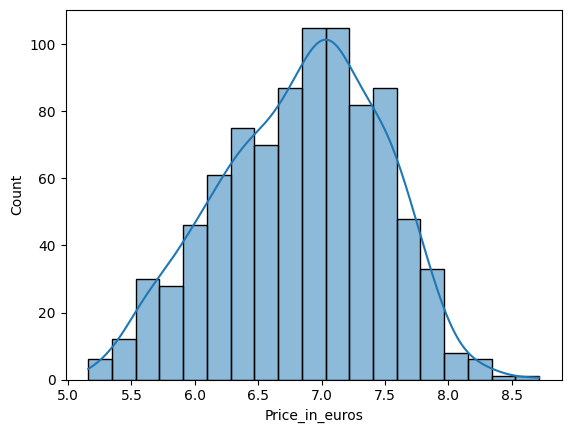

In [40]:
sns.histplot(np.log(df['Price_in_euros']), kde = True)

## Modelado

### 1. Definir X e y

In [41]:
# X = df.drop(['Price_in_euros'], axis=1)
# y = df[].copy()
# X.shape

In [42]:
cat_cols = ['Company', 'TypeName', 'Storage_Type', 'OpSys','gpu_brand', 'Cpu_brand']
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=int) #

In [43]:
df.gpu_brand.unique()

array(['Intel', 'Nvidia', 'AMD'], dtype=object)

In [44]:
df_encoded

Product  Inches                 ScreenResolution  \
755               250 G6    15.6                Full HD 1920x1080   
618        Inspiron 7559    15.6                Full HD 1920x1080   
909          ProBook 450    15.6                Full HD 1920x1080   
2            Macbook Air    13.3                         1440x900   
286        Inspiron 3567    15.6                Full HD 1920x1080   
...                  ...     ...                              ...   
28         Inspiron 5570    15.6                Full HD 1920x1080   
1160         Spectre Pro    13.3  Full HD / Touchscreen 1920x1080   
78    IdeaPad 320-15IKBN    15.6                Full HD 1920x1080   
23                255 G6    15.6                         1366x768   
229         Alienware 17    17.3      IPS Panel Full HD 1920x1080   

                               Cpu   Ram                Memory  \
755       Intel Core i3 6006U 2GHz   8GB             256GB SSD   
618    Intel Core i7 6700HQ 2.6GHz  16GB               1TB HDD   
909     Intel Core i7 7500U 2.7GHz   8GB               1TB HDD   
2             Intel Core i5 1.8GHz   8GB   128GB Flash Storage   
286     Intel Core i3 6006U 2.0GHz   4GB               1TB HDD   
...                            ...   ...                   ...   
28      Intel Core i5 8250U 1.6GHz   8GB             256GB SSD   
1160    Intel Core i5 6300U 2.4GHz   8GB             256GB SSD   
78      Intel Core i5 7200U 2.5GHz   8GB               2TB HDD   
23    AMD E-Series E2-9000e 1.5GHz   4GB             500GB HDD   
229    Intel Core i7 7700HQ 2.8GHz  16GB  256GB SSD +  1TB HDD   

                                 Gpu  Weight  Price_in_euros  touchscreen  \
755            Intel HD Graphics 520  1.86kg          539.00            0   
618   Nvidia GeForce GTX 960<U+039C>  2.59kg          879.01            0   
909             Nvidia GeForce 930MX  2.04kg          900.00            0   
2             Intel HD Graphics 6000  1.34kg          898.94            0   
286               AMD Radeon R5 M430  2.25kg          428.00            0   
...                              ...     ...             ...          ...   
28                    AMD Radeon 530   2.2kg          800.00            0   
1160           Intel HD Graphics 520  1.48kg         1629.00            1   
78             Intel HD Graphics 620   2.2kg          519.00            0   
23                     AMD Radeon R2  1.86kg          258.00            0   
229          Nvidia GeForce GTX 1060  4.42kg         2456.34            0   

      ...  OpSys_Windows 10  OpSys_Windows 10 S OpSys_Windows 7  OpSys_macOS  \
755   ...                 1                   0               0            0   
618   ...                 1                   0               0            0   
909   ...                 1                   0               0            0   
2     ...                 0                   0               0            1   
286   ...                 0                   0               0            0   
...   ...               ...                 ...             ...          ...   
28    ...                 1                   0               0            0   
1160  ...                 1                   0               0            0   
78    ...                 0                   0               0            0   
23    ...                 0                   0               0            0   
229   ...                 1                   0               0            0   

      gpu_brand_Intel  gpu_brand_Nvidia  Cpu_brand_Intel Core i3  \
755                 1                 0                        1   
618                 0                 1                        0   
909                 0                 1                        0   
2                   1                 0                        0   
286                 0                 0                        1   
...               ...               ...                      ...   
28                  0            

In [45]:
df_encoded.columns

Index(['Product', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu',
       'Weight', 'Price_in_euros', 'touchscreen', 'Ips', 'cpu_ghz', 'CpuName',
       'SSD_GB', 'HDD_GB', 'Flash_GB', 'Total_Storage_GB', 'inches', 'ram_gb',
       'weight_kg', 'Company_Apple', 'Company_Asus', 'Company_Dell',
       'Company_HP', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_OthersCompany', 'Company_Razer', 'Company_Toshiba',
       'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook',
       'TypeName_Ultrabook', 'TypeName_Workstation', 'Storage_Type_HDD',
       'Storage_Type_SSD', 'Storage_Type_SSD+HDD', 'OpSys_Chrome OS',
       'OpSys_Linux', 'OpSys_Mac OS X', 'OpSys_No OS', 'OpSys_Windows 10',
       'OpSys_Windows 10 S', 'OpSys_Windows 7', 'OpSys_macOS',
       'gpu_brand_Intel', 'gpu_brand_Nvidia', 'Cpu_brand_Intel Core i3',
       'Cpu_brand_Intel Core i5', 'Cpu_brand_Intel Core i7',
       'Cpu_brand_Other Intel Processor'],
      dtype='object')

In [46]:
features_select = ['touchscreen', 'Ips', 'cpu_ghz', 'SSD_GB',
       'HDD_GB', 'Flash_GB', 'Total_Storage_GB', 'inches', 'ram_gb',
       'weight_kg', 'Company_Apple', 'Company_Asus', 'Company_Dell',
       'Company_HP', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_OthersCompany', 'Company_Razer', 'Company_Toshiba',
       'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook',
       'TypeName_Ultrabook', 'TypeName_Workstation', 'Storage_Type_HDD',
       'Storage_Type_SSD', 'Storage_Type_SSD+HDD', 'OpSys_Chrome OS',
       'OpSys_Linux', 'OpSys_Mac OS X', 'OpSys_No OS', 'OpSys_Windows 10',
       'OpSys_Windows 10 S', 'OpSys_Windows 7', 'OpSys_macOS',
       'gpu_brand_Intel', 'gpu_brand_Nvidia', 'Cpu_brand_Intel Core i3',
       'Cpu_brand_Intel Core i5', 'Cpu_brand_Intel Core i7',
       'Cpu_brand_Other Intel Processor']

In [47]:
X = df_encoded[features_select]
y = df['Price_in_euros']

In [48]:
card_tipo(X)

Card     %_Card     Tipo      tipo_sugerido
touchscreen                        2   0.224467    int64            Binaria
Ips                                2   0.224467    int64            Binaria
cpu_ghz                           25   2.805836  float64  Numerica discreta
SSD_GB                            13   1.459035  float64  Numerica discreta
HDD_GB                             8   0.897868  float64         Categorica
Flash_GB                           7   0.785634  float64         Categorica
Total_Storage_GB                  24   2.693603  float64  Numerica discreta
inches                            17   1.907969  float64  Numerica discreta
ram_gb                             9   1.010101    int64         Categorica
weight_kg                        158  17.732884  float64  Numerica discreta
Company_Apple                      2   0.224467    int64            Binaria
Company_Asus                       2   0.224467    int64            Binaria
Company_Dell                       2   0.224467    int64            Binaria
Company_HP                         2   0.224467    int64            Binaria
Company_Lenovo                     2   0.224467    int64            Binaria
Company_MSI                        2   0.224467    int64            Binaria
Company_Mediacom                   2   0.224467    int64            Binaria
Company_OthersCompany              2   0.224467    int64            Binaria
Company_Razer                      2   0.224467    int64            Binaria
Company_Toshiba                    2   0.224467    int64            Binaria
TypeName_Gaming                    2   0.224467    int64            Binaria
TypeName_Netbook                   2   0.224467    int64            Binaria
TypeName_Notebook                  2   0.224467    int64            Binaria
TypeName_Ultrabook                 2   0.224467    int64            Binaria
TypeName_Workstation               2   0.224467    int64            Binaria
Storage_Type_HDD                   2   0.224467    int64            Binaria
Storage_Type_SSD                   2   0.224467    int64            Binaria
Storage_Type_SSD+HDD               2   0.224467    int64            Binaria
OpSys_Chrome OS                    2   0.224467    int64            Binaria
OpSys_Linux                        2   0.224467    int64            Binaria
OpSys_Mac OS X                     2   0.224467    int64            Binaria
OpSys_No OS                        2   0.224467    int64            Binaria
OpSys_Windows 10                   2   0.224467    int64            Binaria
OpSys_Windows 10 S                 2   0.224467    int64            Binaria
OpSys_Windows 7                    2   0.224467    int64            Binaria
OpSys_macOS                        2   0.224467    int64            Binaria
gpu_brand_Intel                    2   0.224467    int64            Binaria
gpu_brand_Nvidia                   2   0.224467    int64            Binaria
Cpu_brand_Intel Core i3            2   0.224467    int64            Binaria
Cpu_brand_Intel Core i5            2   0.224467    int64            Binaria
Cpu_brand_Intel Core i7            2   0.224467    int64            Binaria
Cpu_brand_Other Intel Processor    2   0.224467    int64            Binaria

In [49]:
y

755      539.00
618      879.01
909      900.00
2        898.94
286      428.00
         ...   
28       800.00
1160    1629.00
78       519.00
23       258.00
229     2456.34
Name: Price_in_euros, Length: 891, dtype: float64

### 2. Dividir X_train, X_test, y_train, y_test

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    

In [51]:
#len(X_train.describe().T.index.tolist())

In [52]:
#  # Scale numerical features
# num_cols = ['inches', 'ram_gb', 'weight_kg', 'SSD_GB', 'HDD_GB', 'Flash_GB', 'Total_Storage_GB']
# scaler = StandardScaler()
# X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
# X_test[num_cols] = scaler.transform(X_test[num_cols])

In [53]:
 # Scale numerical features
# num_cols = X_train.describe().T.index.tolist()
# scaler = StandardScaler()
# X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
# X_test[num_cols] = scaler.transform(X_test[num_cols])

In [54]:
X_train

touchscreen  Ips  cpu_ghz  SSD_GB  HDD_GB  Flash_GB  Total_Storage_GB  \
112             0    1      2.7   256.0     0.0       0.0             256.0   
13              0    1      2.8   256.0     0.0       0.0             256.0   
1190            0    0      1.6     0.0   500.0       0.0             500.0   
55              0    0      2.4     0.0  1000.0       0.0            1000.0   
1043            0    0      2.5   256.0     0.0       0.0             256.0   
...           ...  ...      ...     ...     ...       ...               ...   
578             0    0      1.6     0.0  2000.0       0.0            2000.0   
336             0    0      2.8   256.0  1000.0       0.0            1256.0   
20              1    1      1.6   128.0     0.0       0.0             128.0   
876             0    0      2.3     0.0   500.0       0.0             500.0   
418             0    1      2.8   512.0     0.0       0.0             512.0   

      inches  ram_gb  weight_kg  ...  OpSys_Windows 10  OpSys_Windows 10 S  \
112     14.0       8       1.58  ...                 1                   0   
13      15.4      16       1.83  ...                 0                   0   
1190    15.6       4       2.20  ...                 1                   0   
55      15.6       4       2.40  ...                 1                   0   
1043    17.3       8       2.63  ...                 1                   0   
...      ...     ...        ...  ...               ...                 ...   
578     14.0       8       1.94  ...                 1                   0   
336     17.3       8       2.70  ...                 1                   0   
20      13.3       8       1.22  ...                 1                   0   
876     15.6       4       2.07  ...                 1                   0   
418     14.0       8       1.70  ...                 1                   0   

      OpSys_Windows 7  OpSys_macOS  gpu_brand_Intel  gpu_brand_Nvidia  \
112                 0            0                1                 0   
13                  0            1                0                 0   
1190                0            0                1                 0   
55                  0            0                1                 0   
1043                0            0                0                 1   
...               ...          ...              ...               ...   
578                 0            0                1                 0   
336                 0            0                0                 1   
20                  0            0                1                 0   
876                 0            0                1                 0   
418                 0            0                0                 1   

      Cpu_brand_Intel Core i3  Cpu_brand_Intel Core i5  \
112                         0                        0   
13                          0                        0   
1190                        0                        0   
55                          1                        0   
1043                        0                        1   
...                       ...                      ...   
578                         0                        0   
336                         0                        0   
20                          0                        1   
876                         0                        1   
418                         0                        0   

      Cpu_brand_Intel Core i7  Cpu_brand_Other Intel Processor  
112                         1                                0  
13                          1                                0  
1190                        0                                1  
55                          0                                0  
1043                        0                                0  
...                       ...                              ...  
578                         0                                1  
336                       

In [55]:
X_train.describe()

touchscreen         Ips     cpu_ghz       SSD_GB       HDD_GB  \
count   712.000000  712.000000  712.000000   712.000000   712.000000   
mean      0.117978    0.264045    2.280253   180.123596   402.585674   
std       0.322808    0.441133    0.522584   183.978065   506.465778   
min       0.000000    0.000000    0.900000     0.000000     0.000000   
25%       0.000000    0.000000    1.800000     0.000000     0.000000   
50%       0.000000    0.000000    2.500000   154.000000     0.000000   
75%       0.000000    1.000000    2.700000   256.000000  1000.000000   
max       1.000000    1.000000    3.600000  1000.000000  2000.000000   

         Flash_GB  Total_Storage_GB      inches      ram_gb   weight_kg  ...  \
count  712.000000        712.000000  712.000000  712.000000  712.000000  ...   
mean     5.617978        588.327247   15.001685    8.199438    2.031170  ...   
std     32.680357        464.840963    1.461199    4.937824    0.643482  ...   
min      0.000000          1.000000   10.100000    2.000000    0.690000  ...   
25%      0.000000        256.000000   14.000000    4.000000    1.500000  ...   
50%      0.000000        500.000000   15.600000    8.000000    2.040000  ...   
75%      0.000000       1000.000000   15.600000    8.000000    2.302500  ...   
max    512.000000       2512.000000   18.400000   64.000000    4.700000  ...   

       OpSys_Windows 10  OpSys_Windows 10 S  OpSys_Windows 7  OpSys_macOS  \
count        712.000000          712.000000       712.000000   712.000000   
mean           0.801966            0.005618         0.032303     0.011236   
std            0.398798            0.074795         0.176929     0.105477   
min            0.000000            0.000000         0.000000     0.000000   
25%            1.000000            0.000000         0.000000     0.000000   
50%            1.000000            0.000000         0.000000     0.000000   
75%            1.000000            0.000000         0.000000     0.000000   
max            1.000000            1.000000         1.000000     1.000000   

       gpu_brand_Intel  gpu_brand_Nvidia  Cpu_brand_Intel Core i3  \
count       712.000000        712.000000               712.000000   
mean          0.547753          0.317416                 0.099719   
std           0.498064          0.465798                 0.299836   
min           0.000000          0.000000                 0.000000   
25%           0.000000          0.000000                 0.000000   
50%           1.000000          0.000000                 0.000000   
75%           1.000000          1.000000                 0.000000   
max           1.000000          1.000000                 1.000000   

       Cpu_brand_Intel Core i5  Cpu_brand_Intel Core i7  \
count               712.000000               712.000000   
mean                  0.318820                 0.400281   
std                   0.466347                 0.490300   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   1.000000                 1.000000   
max                   1.000000                 1.000000   

       Cpu_brand_Other Intel Processor  
count                       712.000000  
mean                          0.133427  
std                           0.340275  
min                           0.000000  
25%                           0.000000  
50%                           0.000000  
75%                           0.000000  
max                           1.000000  

[8 rows x 42 columns]

In [56]:
y_train

112     1480.00
13      2439.97
1190     369.00
55       384.00
1043    1080.00
         ...   
578      389.00
336     1199.00
20       979.00
876      910.00
418     1943.00
Name: Price_in_euros, Length: 712, dtype: float64

### 3. Baseline de modelos


In [57]:
# Train models
models = {
        'RF': RandomForestRegressor(n_estimators=100, random_state=42),
        'XGB': xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    }
    
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
        
    results[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        #'R2': r2_score(y_test, y_pred),
        'Feature_Importance': pd.DataFrame({
            'feature': X_train.columns,
            'importance': model.feature_importances_
            }).sort_values('importance', ascending=False)
        }

In [58]:
results

{'RF': {'RMSE': np.float64(304.3145879378246),
  'Feature_Importance':                             feature  importance
  8                            ram_gb    0.493097
  9                         weight_kg    0.093745
  22                TypeName_Notebook    0.078861
  2                           cpu_ghz    0.055212
  3                            SSD_GB    0.045240
  40          Cpu_brand_Intel Core i7    0.038227
  7                            inches    0.029726
  39          Cpu_brand_Intel Core i5    0.026131
  24             TypeName_Workstation    0.020339
  34                  OpSys_Windows 7    0.012718
  18                    Company_Razer    0.011999
  6                  Total_Storage_GB    0.010458
  0                       touchscreen    0.010147
  25                 Storage_Type_HDD    0.008630
  32                 OpSys_Windows 10    0.006304
  11                     Company_Asus    0.006178
  14                   Company_Lenovo    0.005635
  1                            

In [89]:
from sklearn.model_selection import GridSearchCV # o en caso de tener un grid muy grande -> RandozimedSearchCV

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
# Definir los hiperparámetros para Grid Search
param_grid = {
    'n_estimators': [50, 100, 300, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evaluar el modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)
RMSE = root_mean_squared_error(y_test, y_pred)

#print(f"MAE: {mae:.2f}")
print(f"RMSE: {RMSE:.2f}")

Mejores hiperparámetros: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.7}
RMSE: 288.61


In [90]:
best_params = grid_search.best_params_
best_params

{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 500,
 'subsample': 0.7}

In [61]:
# Entrenar el modelo con los mejores hiperparámetros
best_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, **best_params)
best_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [91]:
y_pred = best_model.predict(X_test)

### 4. Sacar métricas, valorar los modelos 

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

In [92]:
RMSE = root_mean_squared_error(y_test, y_pred)
RMSE

np.float64(288.60793002982774)

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 1. Carga los datos de `test.csv` para predecir.


In [64]:
X_pred = pd.read_csv("./data/test.csv", index_col=0)
X_pred.head()

Company                          Product            TypeName  \
laptop_ID                                                                
209        Lenovo               Legion Y520-15IKBN              Gaming   
1281         Acer                   Aspire ES1-531            Notebook   
1168       Lenovo  V110-15ISK (i3-6006U/4GB/1TB/No            Notebook   
1231         Dell                    Inspiron 7579  2 in 1 Convertible   
1020           HP                      ProBook 640            Notebook   

           Inches                           ScreenResolution  \
laptop_ID                                                      
209          15.6                          Full HD 1920x1080   
1281         15.6                                   1366x768   
1168         15.6                                   1366x768   
1231         15.6  IPS Panel Full HD / Touchscreen 1920x1080   
1020         14.0                          Full HD 1920x1080   

                                            Cpu   Ram     Memory  \
laptop_ID                                                          
209                 Intel Core i7 7700HQ 2.8GHz  16GB  512GB SSD   
1281       Intel Celeron Dual Core N3060 1.6GHz   4GB  500GB HDD   
1168                 Intel Core i3 6006U 2.0GHz   4GB    1TB HDD   
1231                 Intel Core i5 7200U 2.5GHz   8GB  256GB SSD   
1020                 Intel Core i5 7200U 2.5GHz   4GB  256GB SSD   

                               Gpu       OpSys   Weight  
laptop_ID                                                
209        Nvidia GeForce GTX 1060       No OS    2.4kg  
1281         Intel HD Graphics 400       Linux    2.4kg  
1168         Intel HD Graphics 520       No OS    1.9kg  
1231         Intel HD Graphics 620  Windows 10  2.191kg  
1020         Intel HD Graphics 620  Windows 10   1.95kg

In [65]:
X_pred.index.name = None

In [66]:
X_pred.loc[X_pred['Company'].isin(brands), 'Company'] = 'OthersCompany'

In [67]:
X_pred["inches"] = X_pred.Inches.astype(float)
X_pred['ram_gb'] = X_pred['Ram'].str.replace('GB', '').astype(int)
X_pred["weight_kg"] = X_pred['Weight'].str.replace('kg', '').astype(float)
X_pred['cpu_ghz'] = (X_pred['Cpu'].apply(lambda x :"" .join(x.split()[-1]))).str.replace('GHz', '').astype(float)
X_pred['gpu_brand']  = X_pred['Gpu'].apply(lambda x:x.split()[0])
X_pred['CpuName'] = X_pred['Cpu'].apply(lambda x :" " .join(x.split()[:3]))
X_pred['Cpu_brand'] = X_pred['CpuName'].apply(nombre_processor)


In [68]:
X_pred['touchscreen'] = X_pred['ScreenResolution'].apply(lambda x:1 if "Touchscreen" in x else 0)

In [69]:
X_pred['Ips'] = X_pred['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [70]:
X_pred = process_storage(X_pred)

In [71]:

X_pred = pd.get_dummies(X_pred, columns=cat_cols, drop_first=True, dtype=int) #

In [72]:
missing_cols = set(X_train.columns) - set(X_pred.columns)  # Columnas faltantes
missing_cols


{'OpSys_Chrome OS'}

In [73]:
for col in missing_cols:
    X_pred[col] = 0 

In [74]:
X_pred = X_pred[features_select]

In [75]:
X_pred.tail()

touchscreen  Ips  cpu_ghz  SSD_GB  HDD_GB  Flash_GB  Total_Storage_GB  \
820             0    0      2.8   512.0  1000.0       0.0            1512.0   
948             0    1      2.3   128.0     0.0       0.0             128.0   
483             0    0      2.8   256.0     0.0       0.0             256.0   
1017            0    0      2.5     0.0   500.0       0.0             500.0   
421             1    1      2.5   256.0     0.0       0.0             256.0   

      inches  ram_gb  weight_kg  ...  OpSys_Windows 10  OpSys_Windows 10 S  \
820     17.3      16       2.90  ...                 1                   0   
948     14.0       4       1.47  ...                 1                   0   
483     15.6       8       1.78  ...                 1                   0   
1017    14.0       4       1.64  ...                 1                   0   
421     13.3       8       1.27  ...                 1                   0   

      OpSys_Windows 7  OpSys_macOS  gpu_brand_Intel  gpu_brand_Nvidia  \
820                 0            0                0                 1   
948                 0            0                1                 0   
483                 0            0                0                 1   
1017                0            0                1                 0   
421                 0            0                1                 0   

      Cpu_brand_Intel Core i3  Cpu_brand_Intel Core i5  \
820                         0                        0   
948                         0                        1   
483                         0                        0   
1017                        0                        1   
421                         0                        1   

      Cpu_brand_Intel Core i7  Cpu_brand_Other Intel Processor  
820                         1                                0  
948                         0                                0  
483                         1                                0  
1017                        0                                0  
421                         0                                0  

[5 rows x 42 columns]

In [76]:
# Scale numerical features
# num_cols = num_cols = X_train.describe().T.index.tolist()
# scaler = StandardScaler()
# X_pred[num_cols] = scaler.fit_transform(X_pred[num_cols])


In [77]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   touchscreen                      391 non-null    int64  
 1   Ips                              391 non-null    int64  
 2   cpu_ghz                          391 non-null    float64
 3   SSD_GB                           391 non-null    float64
 4   HDD_GB                           391 non-null    float64
 5   Flash_GB                         391 non-null    float64
 6   Total_Storage_GB                 391 non-null    float64
 7   inches                           391 non-null    float64
 8   ram_gb                           391 non-null    int64  
 9   weight_kg                        391 non-null    float64
 10  Company_Apple                    391 non-null    int64  
 11  Company_Asus                     391 non-null    int64  
 12  Company_Dell             

 ## 2. Replicar el procesado para ``test.csv``

In [78]:
X_pred

touchscreen  Ips  cpu_ghz  SSD_GB  HDD_GB  Flash_GB  Total_Storage_GB  \
209             0    0      2.8   512.0     0.0       0.0             512.0   
1281            0    0      1.6     0.0   500.0       0.0             500.0   
1168            0    0      2.0     0.0  1000.0       0.0            1000.0   
1231            1    1      2.5   256.0     0.0       0.0             256.0   
1020            0    0      2.5   256.0     0.0       0.0             256.0   
...           ...  ...      ...     ...     ...       ...               ...   
820             0    0      2.8   512.0  1000.0       0.0            1512.0   
948             0    1      2.3   128.0     0.0       0.0             128.0   
483             0    0      2.8   256.0     0.0       0.0             256.0   
1017            0    0      2.5     0.0   500.0       0.0             500.0   
421             1    1      2.5   256.0     0.0       0.0             256.0   

      inches  ram_gb  weight_kg  ...  OpSys_Windows 10  OpSys_Windows 10 S  \
209     15.6      16      2.400  ...                 0                   0   
1281    15.6       4      2.400  ...                 0                   0   
1168    15.6       4      1.900  ...                 0                   0   
1231    15.6       8      2.191  ...                 1                   0   
1020    14.0       4      1.950  ...                 1                   0   
...      ...     ...        ...  ...               ...                 ...   
820     17.3      16      2.900  ...                 1                   0   
948     14.0       4      1.470  ...                 1                   0   
483     15.6       8      1.780  ...                 1                   0   
1017    14.0       4      1.640  ...                 1                   0   
421     13.3       8      1.270  ...                 1                   0   

      OpSys_Windows 7  OpSys_macOS  gpu_brand_Intel  gpu_brand_Nvidia  \
209                 0            0                0                 1   
1281                0            0                1                 0   
1168                0            0                1                 0   
1231                0            0                1                 0   
1020                0            0                1                 0   
...               ...          ...              ...               ...   
820                 0            0                0                 1   
948                 0            0                1                 0   
483                 0            0                0                 1   
1017                0            0                1                 0   
421                 0            0                1                 0   

      Cpu_brand_Intel Core i3  Cpu_brand_Intel Core i5  \
209                         0                        0   
1281                        0                        0   
1168                        1                        0   
1231                        0                        1   
1020                        0                        1   
...                       ...                      ...   
820                         0                        0   
948                         0                        1   
483                         0                        0   
1017                        0                        1   
421                         0                        1   

      Cpu_brand_Intel Core i7  Cpu_brand_Other Intel Processor  
209                         1                                0  
1281                        0                                1  
1168                        0                                0  
1231                        0                                0  
1020                        0                                0  
...                       ...                              ...  
820                         1                                0  
948                       

In [79]:
predictions_submit = best_model.predict(X_pred)
predictions_submit

array([1507.6138 ,  281.62137,  383.84467,  992.683  , 1073.3354 ,
        500.26755,  796.07135,  927.2627 , 1290.0083 ,  308.48337,
       2514.253  , 1486.2607 ,  502.902  , 1876.2942 ,  943.14636,
        772.55286, 2096.1448 , 1451.7158 , 1927.8821 ,  675.34375,
       1311.6492 ,  307.86252,  827.47675, 1168.131  ,  449.03018,
        695.4543 ,  570.94775,  571.1496 , 2522.6404 , 1019.57623,
       2229.45   ,  411.48834, 1020.86365, 2699.1907 , 2223.3586 ,
       1995.7568 ,  661.6003 , 1408.7252 ,  931.54156, 1628.1267 ,
        759.9119 ,  854.09845,  499.38724, 1279.0896 , 1132.468  ,
       1052.8646 , 1094.1063 ,  583.7507 ,  631.33417,  414.85922,
       1808.8069 ,  704.2739 , 1162.0314 ,  740.56384, 1555.8119 ,
       1804.4257 ,  640.29333,  860.80096,  893.57715,  540.8765 ,
       2895.7805 , 1583.7379 ,  445.49316, 1998.5359 , 1476.6259 ,
       1498.4954 , 1065.1799 , 1244.7438 , 1719.8523 , 2028.2568 ,
        834.4895 ,  408.1871 , 1034.2201 , 1738.2023 , 1009.08

**¡OJO! ¿Por qué me da error?** 

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [80]:
# ¿Qué opináis?
# ¿Sí, no?

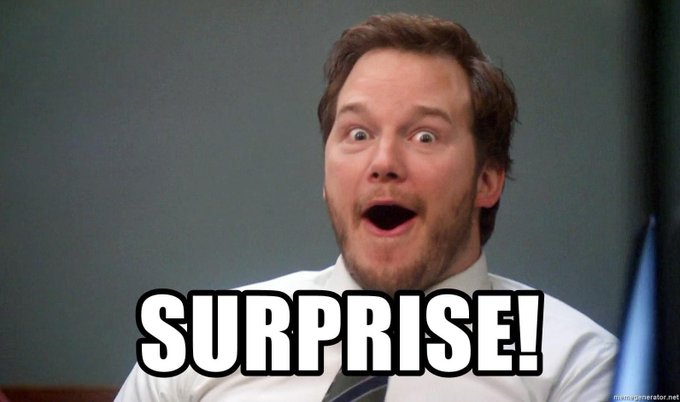

### 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [81]:
sample = pd.read_csv("data/sample_submission.csv")

In [82]:
sample.head()

laptop_ID  Price_in_euros
0        209          1949.1
1       1281           805.0
2       1168          1101.0
3       1231          1293.8
4       1020          1832.6

In [83]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [84]:
#¿Cómo creamos la submission?
submissionV6bis = pd.DataFrame({'laptop_ID': X_pred.index, 'Price_in_euros': predictions_submit})

In [85]:
submissionV6bis.head(20)

laptop_ID  Price_in_euros
0         209     1507.613770
1        1281      281.621368
2        1168      383.844666
3        1231      992.682983
4        1020     1073.335449
5         379      500.267548
6         553      796.071350
7         172      927.262695
8         779     1290.008301
9         609      308.483368
10        256     2514.252930
11        117     1486.260742
12        283      502.902008
13       1195     1876.294189
14        588      943.146362
15        743      772.552856
16        715     2096.144775
17        160     1451.715820
18       1021     1927.882080
19         49      675.343750

In [86]:
submissionV6bis.shape

(391, 2)

### 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [87]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submissionV6bis.to_csv("submissionV6bis.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [88]:
chequeador(submissionV6bis)

You're ready to submit!


features num no escaladas

features cat get.dummies

Busqueda de best model entre RandomForest y Xgboost

mejor Xgboost 
busqueda de mejores paramestos con gridSearc

